# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:

# # importing pandas
# import pandas as pd
  
# # merging two csv files
# df = pd.concat(
#     map(pd.read_csv, ['/content/drive/MyDrive/Hand_written_digits_recognition/data.csv', '/content/drive/MyDrive/Hand_written_digits_recognition/train.csv']), ignore_index=True)
# df.head()

# Analysing Data

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Hand_written_digits_recognition/data.csv')
df2=pd.read_csv('/content/drive/MyDrive/Hand_written_digits_recognition/train.csv')

In [ ]:
df1.head()

0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0    0    0    0    0    0  ...      0      0      0      0      0      0
1  0    0    0    0    0    0  ...      0      0      0      0      0      0
2  0    0    0    0    0    0  ...      0      0      0      0      0      0
3  0    0    0    0    0    0  ...      0      0      0      0      0      0
4  0    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]

In [ ]:
df2.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df1.shape

(372450, 785)

In [ ]:
df2.shape

(42000, 785)

In [ ]:
# df1.rename(columns=lambda s: s*3
l=df2.columns

In [ ]:
df1.columns=l
df1.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      0       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      0       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df1['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
df2['label']=df2['label']+26
df2.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0     27       0       0       0  ...         0         0         0         0
1     26       0       0       0  ...         0         0         0         0
2     27       0       0       0  ...         0         0         0         0
3     30       0       0       0  ...         0         0         0         0
4     26       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      0       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      0       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
del df1
del df2

In [ ]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

In [ ]:
data_array.shape

(414450, 785)

In [ ]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

In [ ]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(414450,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076
0  :  4132
1  :  4684
2  :  4177
3  :  4351
4  :  4072
5  :  3795
6  :  4137
7  :  4401
8  :  4063
9  :  4188


<BarContainer object of 36 artists>

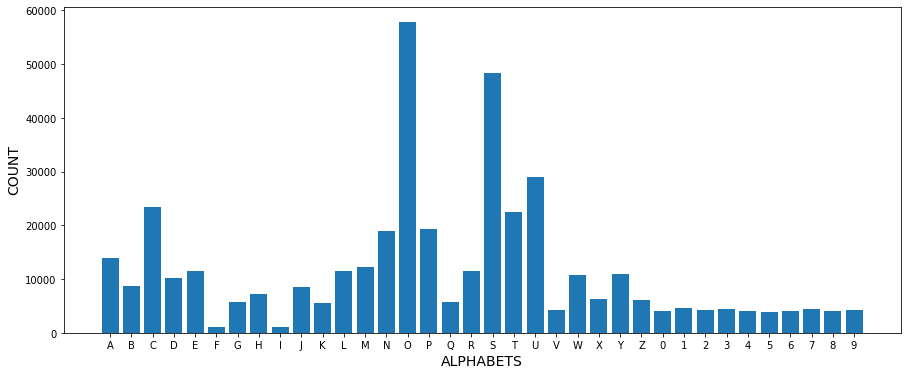

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

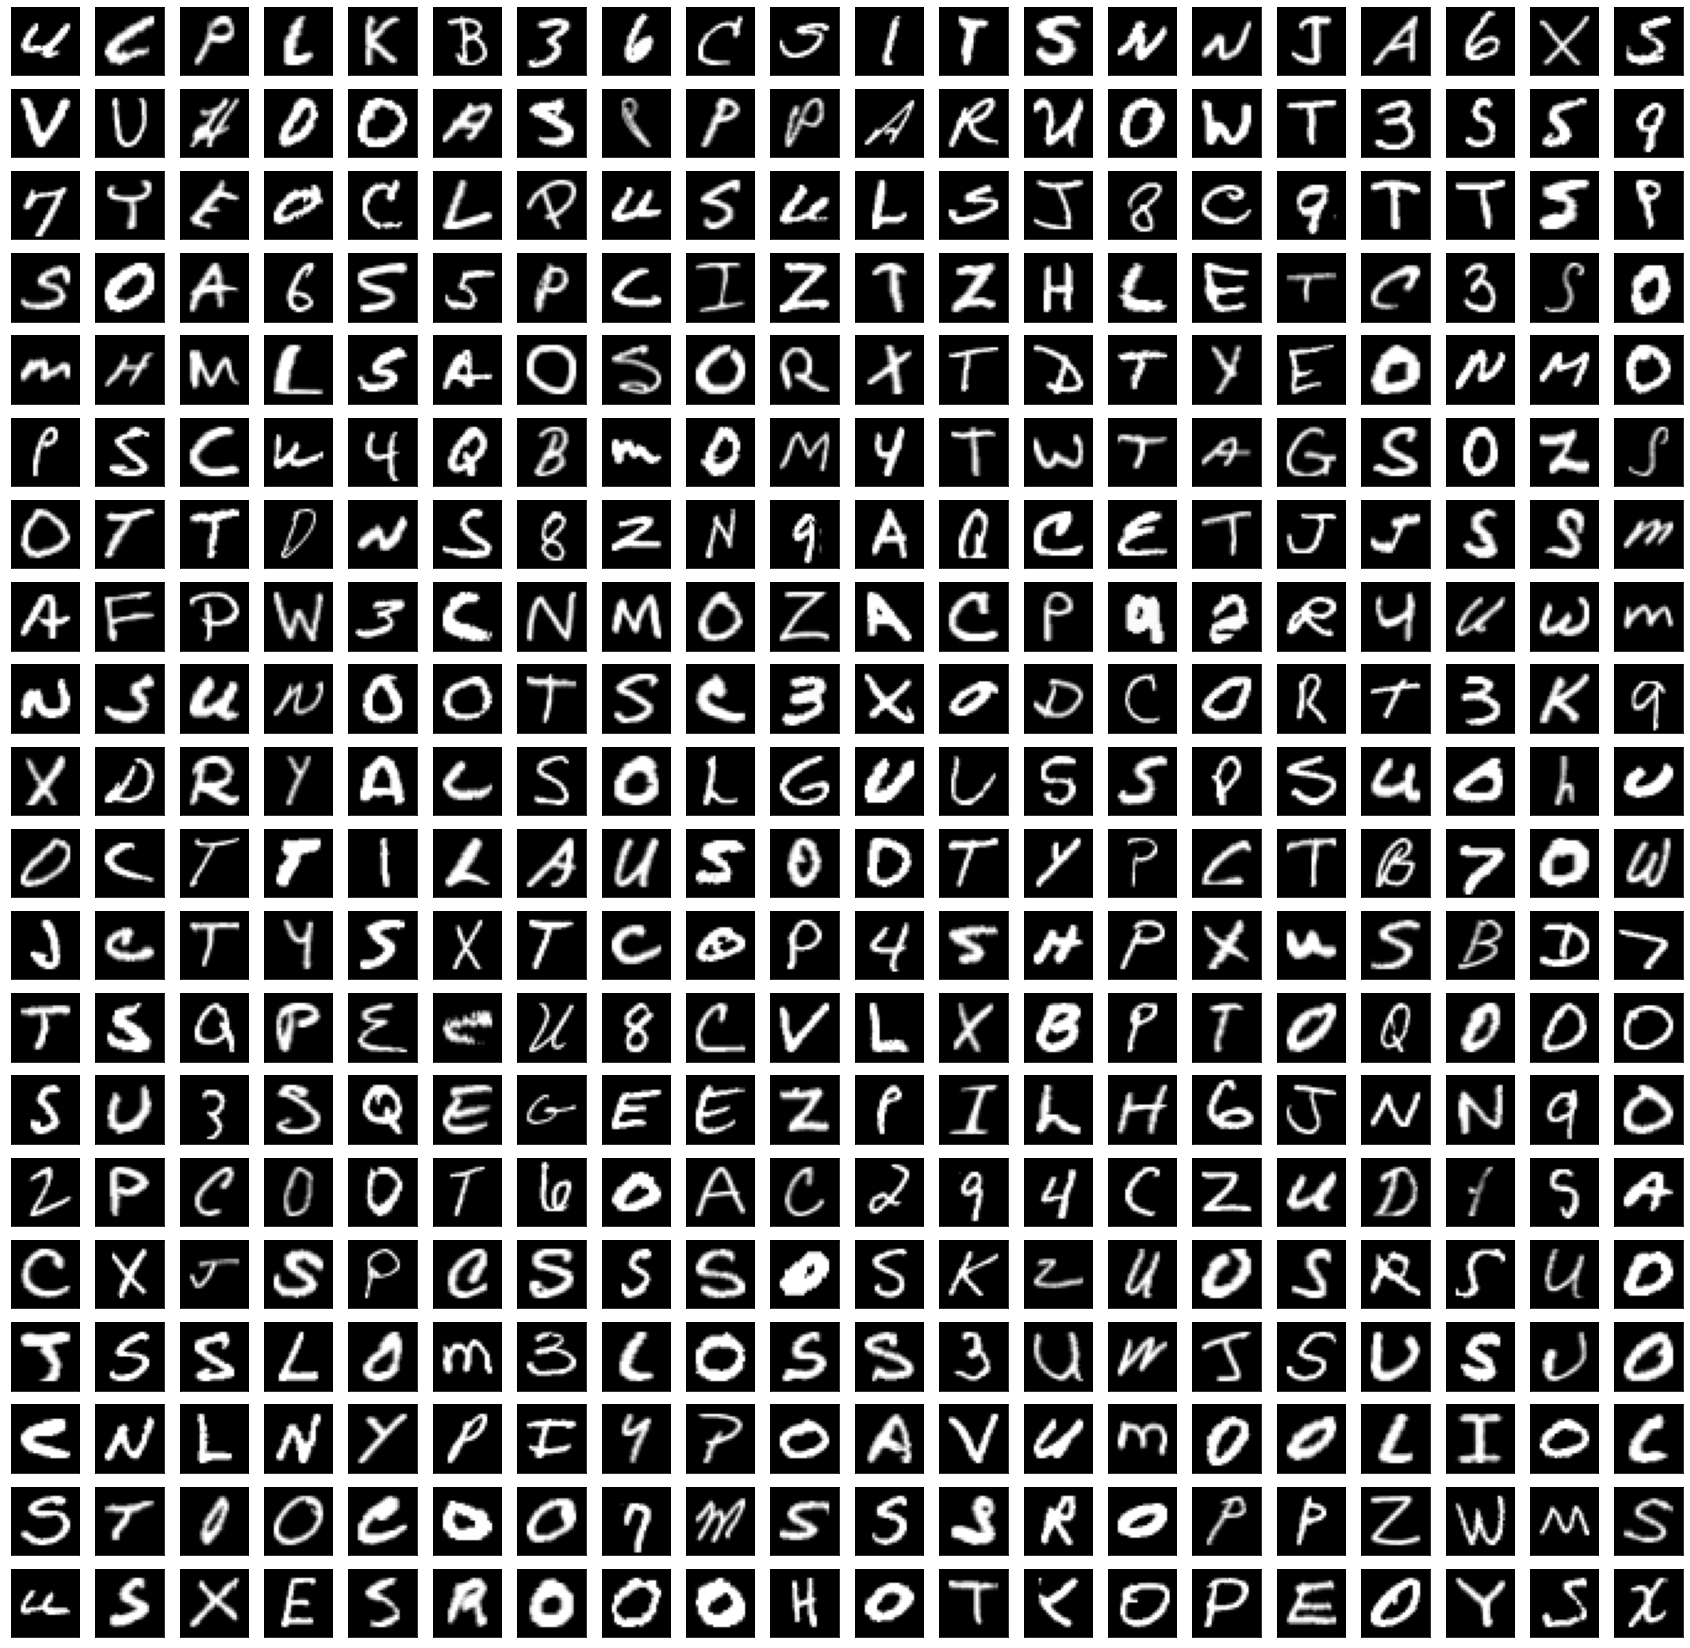

In [ ]:
a=np.random.randint(low=0,high=414450,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a    

In [ ]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x=x.reshape(414450,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(410305, 28, 28, 1)
(4145, 28, 28, 1)
(410305,)
(4145,)


# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(36,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
5770/5770 [==============================] - 172s 28ms/step - loss: 0.2141 - accuracy: 0.9428 - val_loss: 0.0829 - val_accuracy: 0.9771
Epoch 2/5
5770/5770 [==============================] - 160s 28ms/step - loss: 0.0905 - accuracy: 0.9753 - val_loss: 0.0688 - val_accuracy: 0.9807
Epoch 3/5
5770/5770 [==============================] - 164s 28ms/step - loss: 0.0709 - accuracy: 0.9805 - val_loss: 0.0525 - val_accuracy: 0.9851
Epoch 4/5
5770/5770 [==============================] - 160s 28ms/step - loss: 0.0589 - accuracy: 0.9835 - val_loss: 0.0510 - val_accuracy: 0.9853
Epoch 5/5
5770/5770 [==============================] - 160s 28ms/step - loss: 0.0508 - accuracy: 0.9855 - val_loss: 0.0490 - val_accuracy: 0.9865


In [ ]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

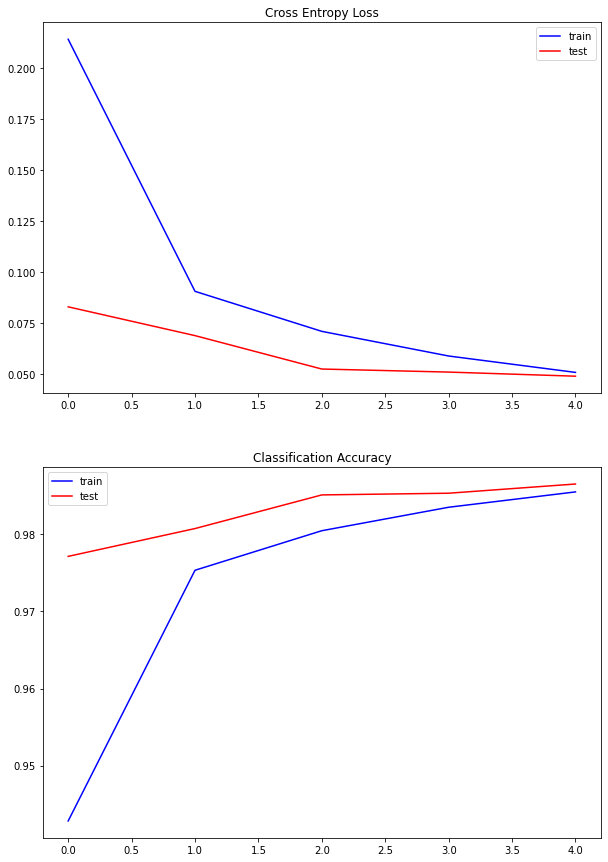

In [ ]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [ ]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

130/130 [==============================] - 1s 9ms/step - loss: 0.0505 - accuracy: 0.9862
Test Acuracy is : 98.62
Test Loss is : 0.05


In [ ]:
model.save('Alphabet_digit_Recognition')

INFO:tensorflow:Assets written to: Alphabet_digit_Recognition/assets


In [ ]:
model=tf.keras.models.load_model('Alphabet_digit_Recognition')

In [ ]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

130/130 [==============================] - 1s 9ms/step - loss: 0.0505 - accuracy: 0.9862
[0.050514135509729385, 0.9862484931945801]
Test Acuracy is : 98.62
Test Loss is : 0.05


# Evaluating On Test Dataset

In [ ]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

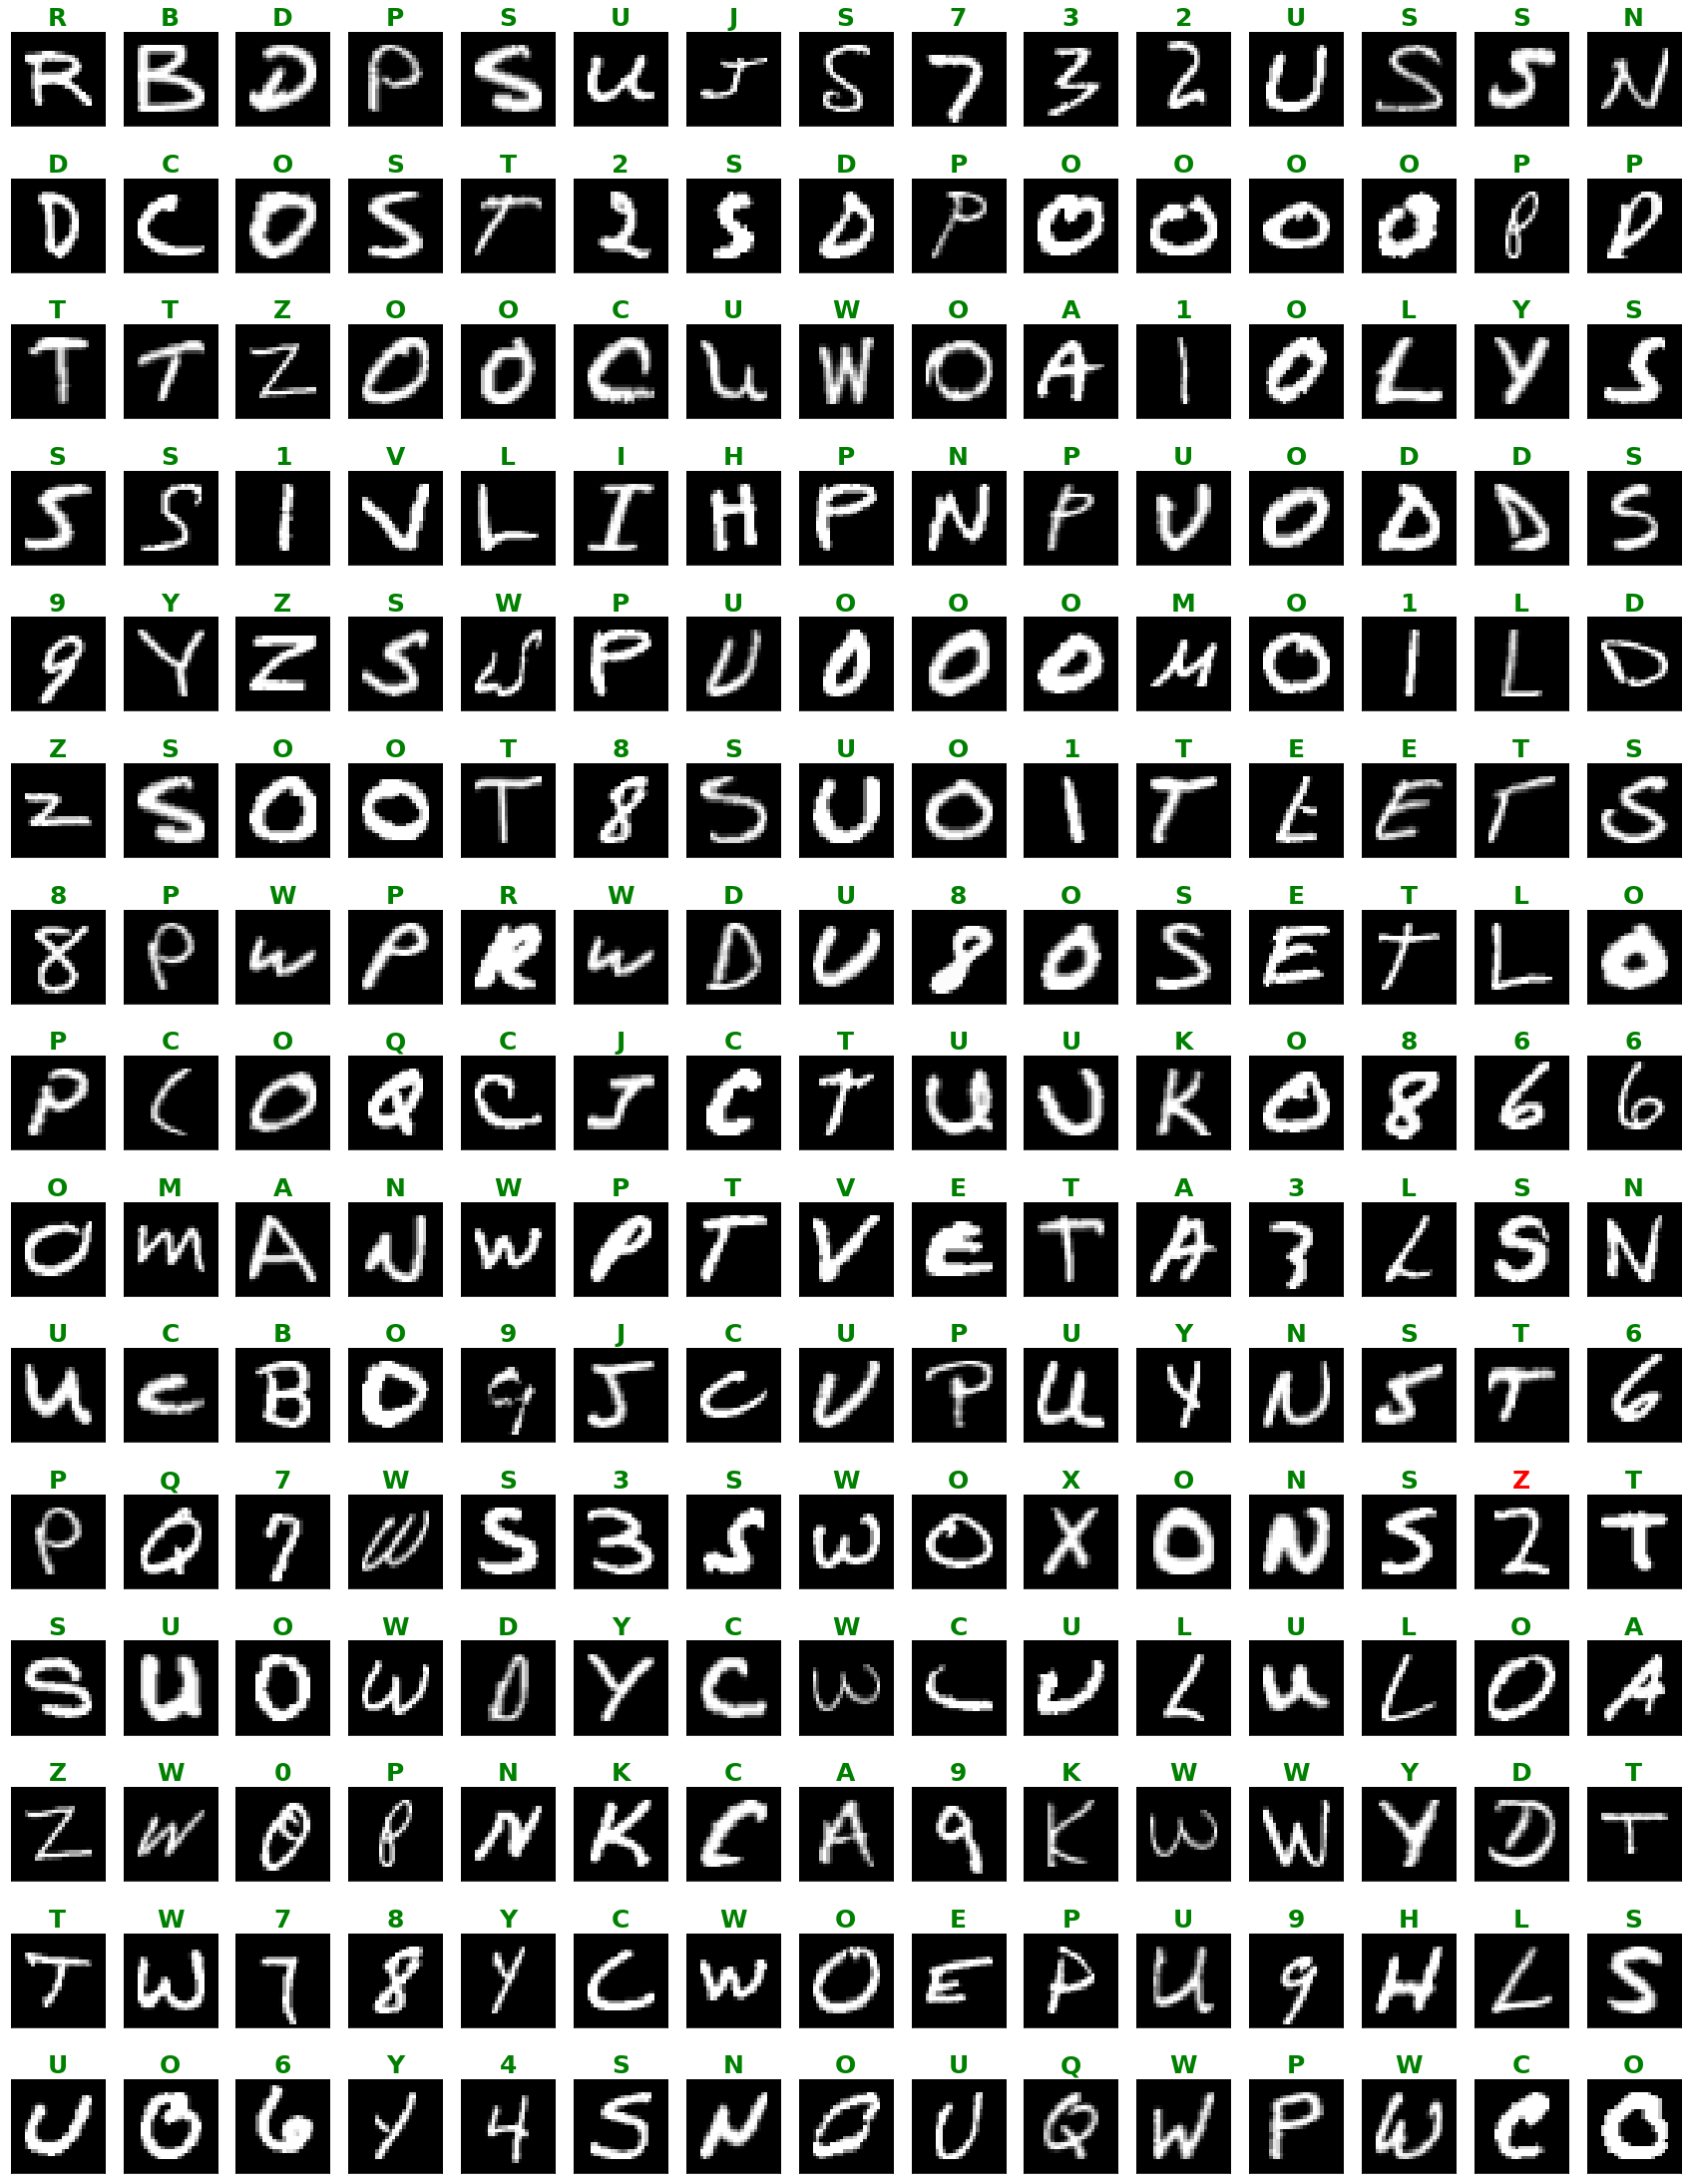

In [ ]:
test_images()

# Test your Image

In [ ]:
import cv2

In [ ]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

In [ ]:
def alphabet_recognize(filepath):
    image = cv2.imread(filepath)
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # initialize the reverse flag and sort index
    # handle if we need to sort in reverse
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                    key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets=[]
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("The Recognized Alphabets are : " ,*alphabets)

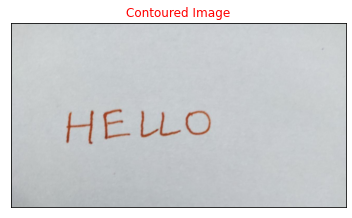

The Recognized Alphabets are :  H E L L O


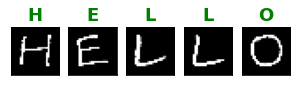

In [ ]:
alphabet_recognize('/content/drive/MyDrive/Hand_written_digits_recognition/1.jpg')

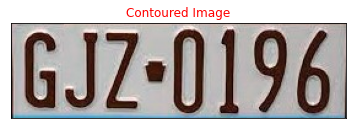

The Recognized Alphabets are :  O G J O Z O O O I S G O


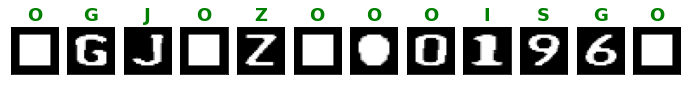

In [ ]:
alphabet_recognize('/content/drive/MyDrive/Hand_written_digits_recognition/2.jpg')

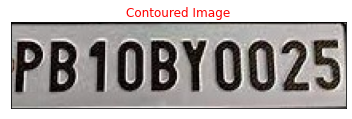

The Recognized Alphabets are :  O P B J O O L O O O B A T O O Z S O O


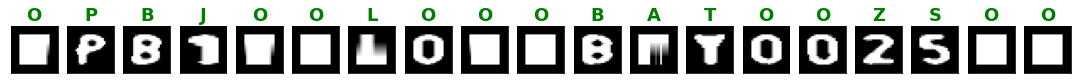

In [ ]:
alphabet_recognize('/content/drive/MyDrive/Hand_written_digits_recognition/3.jpg')

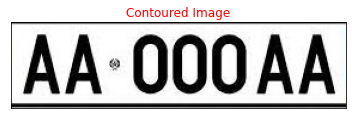

The Recognized Alphabets are :  O O A O A O O O O O L A O A D


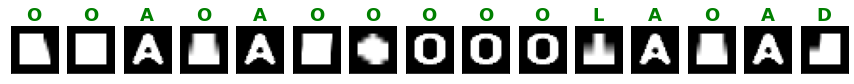

In [ ]:
alphabet_recognize('/content/drive/MyDrive/Hand_written_digits_recognition/4.jpg')

In [ ]:
alphabet_recognize('/content/drive/MyDrive/Hand_written_digits_recognition/5.jpg')

The Recognized Alphabets are :  K L O S A H T Z T T


In [ ]:
# alphabet_recognize('6.jpg')